In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

In [3]:
df = pd.read_csv("/Users/yvonnelu/Desktop/BANA 275 NLP/Week 2/covid19.csv", index_col =0)

In [4]:
df

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
cord_uid,,,,,,,,,,,,,,,,
vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360s2yu,289deae0b2050aa259a05ba84565a4df82fa099a,Elsevier,Personal Protective Equipment: Protecting Heal...,10.1016/j.clinthera.2015.07.007,PMC4661082,26452427.0,els-covid,Abstract Purpose The recent Ebola epidemic tha...,2015-11-01,"Fischer, William A.; Weber, David J.; Wohl, Da...",Clinical Therapeutics,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.clinthera.2015.07.007
66jumbir,21a4369f83891bf6975dd916c0aa495d5df8709e,Elsevier,Viruses and asthma,10.1016/j.bbagen.2011.01.012,PMC3130828,21291960.0,els-covid,Abstract Background Viral respiratory infectio...,2011-11-30,"Dulek, Daniel E.; Peebles, R. Stokes",Biochimica et Biophysica Acta (BBA) - General ...,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.bbagen.2011.01.012
3wk36h9p,NaN,Elsevier,Why the WHO won't use the p-word,10.1016/s0262-4079(20)30474-7,NaN,NaN,els-covid,"There are no criteria for a pandemic, but covi...",2020-03-07,"MacKenzie, Debora",New Scientist,NaN,#5716,False,custom_license,https://doi.org/10.1016/s0262-4079(20)30474-7


In [5]:
df.shape

(45774, 16)

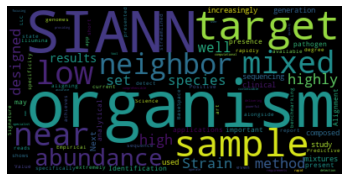

In [7]:
# Start with one review:
text = df.abstract[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#convert abstract text to string
df.abstract = str(df.abstract)

In [11]:
text = " ".join(abstract for abstract in df.abstract)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 33689663 words in the combination of all review.


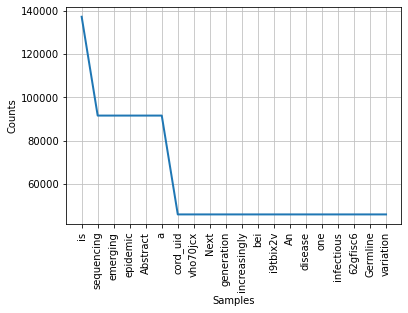

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(20)

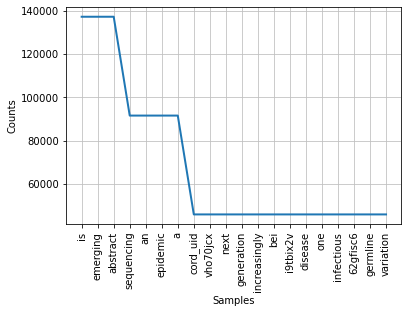

In [13]:
#Convert everything to lowercase
text = text.lower()
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(20)

In [14]:
#stemming
from nltk.stem import PorterStemmer

stemmer= PorterStemmer()

for word in tokens[1:10]:
    print(stemmer.stem(word))

vho70jcx
next
gener
sequenc
is
increasingli
bei
i9tbix2v
an


In [15]:
#lemmatizations
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

for word in tokens[1:100]:
    print(lemmatizer.lemmatize(word))
    
#lemmatized_text = ""
#for word in tokens:
#    lemmatized_text = lemmatized_text + " " + lemmatizer.lemmatize(word)

vho70jcx
next
generation
sequencing
is
increasingly
bei
i9tbix2v
an
emerging
disease
is
one
infectious
epidemic
62gfisc6
germline
variation
at
immunoglobulin
gene
ig
058r9486
deep
sequencing
of
clinical
sample
is
now
an
wich35l7
developing
method
to
reconstruct
transmission
4360s2yu
abstract
purpose
the
recent
ebola
epidemic
tha
66jumbir
abstract
background
viral
respiratory
infectio
3wk36h9p
there
are
no
criterion
for
a
pandemic
but
covi
0ujw0gak
nan
28vx9w58
emerging
and
re
emerging
pathogen
represent
a
name
abstract
length
45774
dtype
object
cord_uid
vho70jcx
next
generation
sequencing
is
increasingly
bei
i9tbix2v
an
emerging
disease
is
one
infectious
epidemic
62gfisc6
germline
variation
at
immunoglobulin
gene


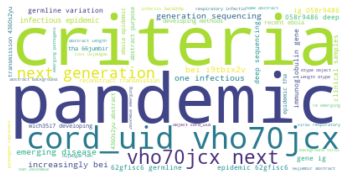

In [17]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["now"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()